# HANDWRITTEN DIGITS CLASSIFIER

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd

## LOADING DATASET

In [ ]:
digits = datasets.load_digits()

X, y = digits.data, digits.target

print(f"Feature Matrix Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

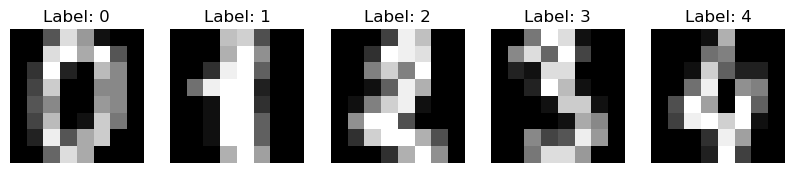

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

## SPLITING DATASET

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## TRAINING SVM MODEL

In [16]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [18]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

Model Accuracy: 0.9806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## TRAINING KNN MODEL

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print(f"KNN Accuracy: {knn_model.score(X_test, y_test):.4f}")

KNN Accuracy: 0.9750


## TRAINING RANDOM FOREST MODEL

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(f"Random Forest Accuracy: {rf_model.score(X_test, y_test):.4f}")

Random Forest Accuracy: 0.9722


## PREDICTION BY SVM MODEL

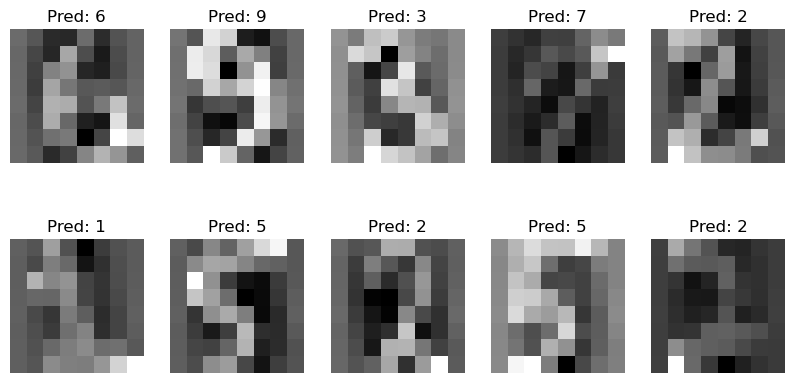

In [30]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

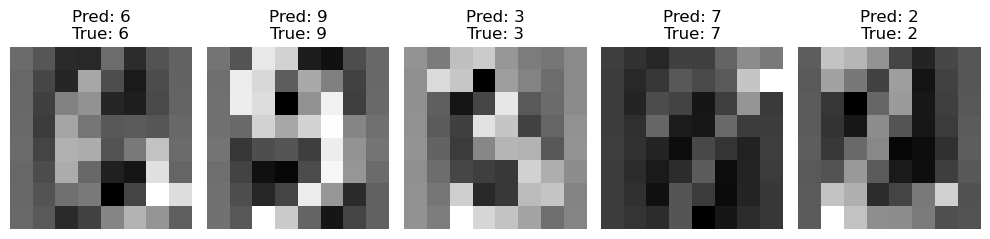

In [34]:
def plot_svm_predictions(model, X_test, y_test):
    fig, axes = plt.subplots(1, 5, figsize=(10, 3))
    y_pred = model.predict(X_test)
    
    for j, ax in enumerate(axes):
        ax.imshow(X_test[j].reshape(8, 8), cmap='gray')
        ax.set_title(f"Pred: {y_pred[j]}\nTrue: {y_test[j]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_svm_predictions(svm_model, X_test, y_test)

## COMPARISON BETWEEN SVM, KNN and RANDOM FOREST MODELS

SVM Accuracy: 0.9806
Random Forest Accuracy: 0.9722
KNN Accuracy: 0.9750


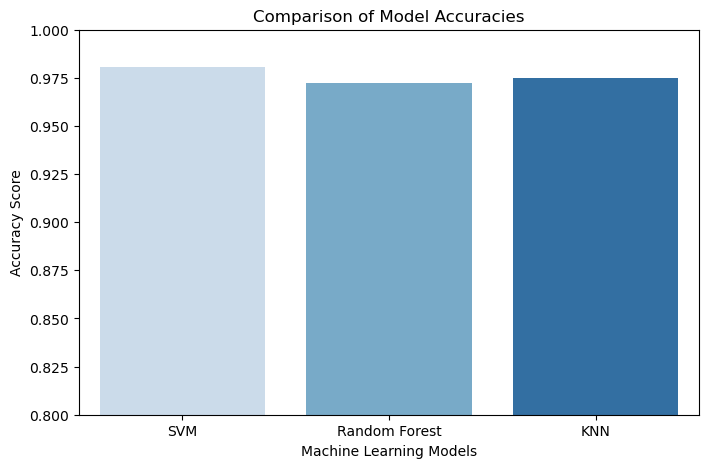

In [64]:
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

data = pd.DataFrame({"Model": ["SVM", "Random Forest", "KNN"], "Accuracy": [accuracy_svm, accuracy_rf, accuracy_knn]})

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.8, 1.0)
plt.legend([], [], frameon=False)
plt.show()